## Loading and normalizing CIFAR10

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truch')

0it [00:00, ?it/s]

170500096it [00:09, 18303265.64it/s]                              


Files already downloaded and verified


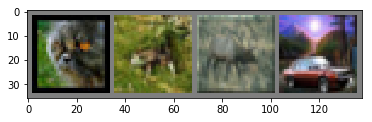

  cat  frog  deer   car


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

# Get some rand training image
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))

# Print lables
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define a CNN

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
 
net = Net()

## Define a loss function and optimizer

We use a classication cross-entropy loss and SGD with momentum.

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Train the network

In [7]:
for epoch in range(2):  # loop over the dataset multiple tiems
  
  running_loss = 0.0
  
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # print statistics
    running_loss += loss.item()
    
    if i % 2000 == 1999:   # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.864
[1,  6000] loss: 1.706
[1,  8000] loss: 1.631
[1, 10000] loss: 1.547
[1, 12000] loss: 1.524
[2,  2000] loss: 1.436
[2,  4000] loss: 1.415
[2,  6000] loss: 1.384
[2,  8000] loss: 1.376
[2, 10000] loss: 1.369
[2, 12000] loss: 1.315
Finished Training


## Test the network on the test data

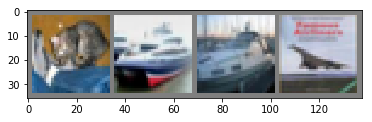

GroundTruth:    cat  ship  ship plane


In [8]:
# First display an image from the test set...
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [11]:
# Prediction on test set
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


Predicted:    cat   car plane  ship


In [12]:
# NN's performance on the whole dataset

correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10k test images: %d %%' % (100 * correct/total))


Accuracy of the network on the 10k test images: 51 %


In [14]:
# Finding which classes performed well, which didn't.

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs  =net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 61 %
Accuracy of  bird : 55 %
Accuracy of   cat : 42 %
Accuracy of  deer : 23 %
Accuracy of   dog : 30 %
Accuracy of  frog : 71 %
Accuracy of horse : 55 %
Accuracy of  ship : 57 %
Accuracy of truch : 49 %
